C:\Users\mindd\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

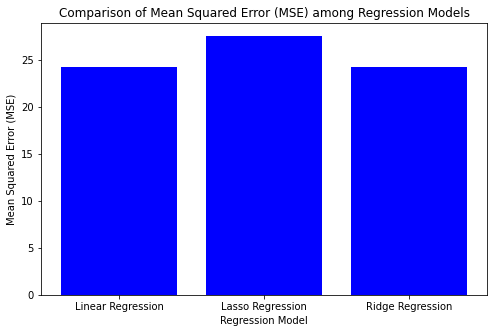

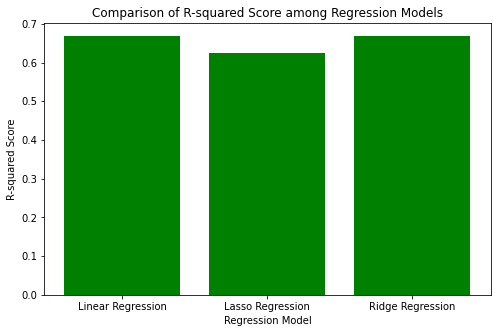

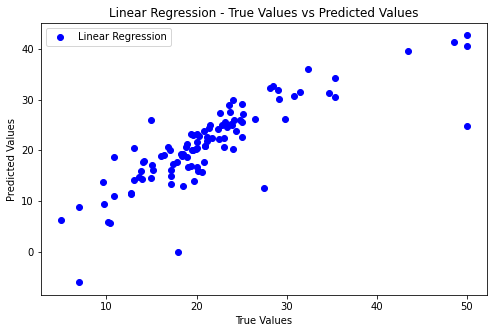

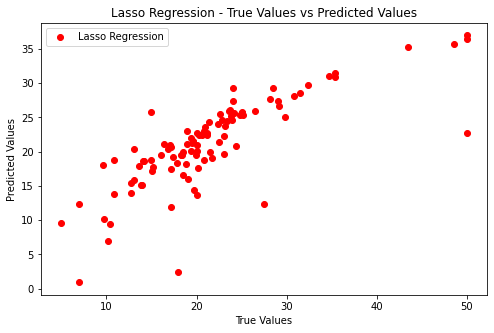

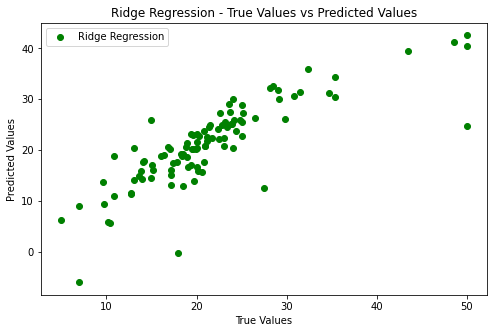

Mean Squared Error (MSE) scores:
Linear Regression : 24.291119474973527
Lasso Regression : 27.57769177613475
Ridge Regression : 24.312903830491575

R-squared scores:
Linear Regression : 0.6687594935356318
Lasso Regression : 0.6239428734251422
Ridge Regression : 0.6684624359643564

The best model based on Mean Squared Error (MSE) is: Linear Regression


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston housing dataset
data = load_boston()
X, y = data.data, data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)

# Create and fit the lasso regression model
alpha_lasso = 1.0  # Regularization parameter for Lasso
lasso_regression = Lasso(alpha=alpha_lasso)
lasso_regression.fit(X_train_scaled, y_train)

# Create and fit the ridge regression model
alpha_ridge = 1.0  # Regularization parameter for Ridge
ridge_regression = Ridge(alpha=alpha_ridge)
ridge_regression.fit(X_train_scaled, y_train)

# Make predictions
linear_predictions = linear_regression.predict(X_test_scaled)
lasso_predictions = lasso_regression.predict(X_test_scaled)
ridge_predictions = ridge_regression.predict(X_test_scaled)

# Evaluate performance metrics
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Plotting the comparison
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
mse_scores = [linear_mse, lasso_mse, ridge_mse]
r2_scores = [linear_r2, lasso_r2, ridge_r2]

# Bar plot for MSE scores
plt.figure(figsize=(8, 5))
plt.bar(models, mse_scores, color='blue')
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Regression Models')
plt.show()

# Bar plot for R-squared scores
plt.figure(figsize=(8, 5))
plt.bar(models, r2_scores, color='green')
plt.xlabel('Regression Model')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Score among Regression Models')
plt.show()

# Scatter plot for linear regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, linear_predictions, color='blue', label='Linear Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - True Values vs Predicted Values')
plt.legend()
plt.show()

# Scatter plot for lasso regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lasso_predictions, color='red', label='Lasso Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression - True Values vs Predicted Values')
plt.legend()
plt.show()

# Scatter plot for ridge regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, ridge_predictions, color='green', label='Ridge Regression')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression - True Values vs Predicted Values')
plt.legend()
plt.show()

# Summary of performance
print("Mean Squared Error (MSE) scores:")
for i in range(len(models)):
    print(models[i], ":", mse_scores[i])
print("\nR-squared scores:")
for i in range(len(models)):
    print(models[i], ":", r2_scores[i])

# Determine which model is better based on MSE
best_model = models[np.argmin(mse_scores)]
print("\nThe best model based on Mean Squared Error (MSE) is:", best_model)
